In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Exploratory analysis

In [5]:
df.isnull().sum()[df.isnull().sum() >= len(df)*0.2]

Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [6]:
null_fracs = df.isnull().sum()[df.isnull().sum() >= len(df)*0.2]/len(df)
null_fracs = list(zip(null_fracs.index, round(null_fracs, 3)))
null_fracs

[('Alley', 0.938),
 ('FireplaceQu', 0.473),
 ('PoolQC', 0.995),
 ('Fence', 0.808),
 ('MiscFeature', 0.963)]

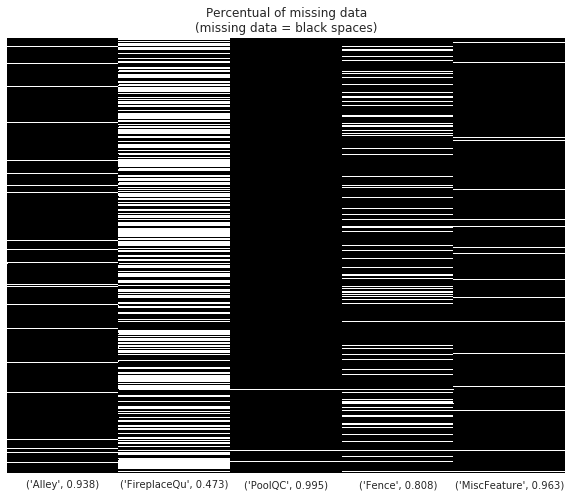

In [9]:
null_cols = df.isnull().sum()[df.isnull().sum() >= len(df)*0.3].index

plt.figure(figsize = (10, 8))
sns.heatmap(df[null_cols].isnull(), yticklabels=False, cbar=False, cmap='CMRmap_r', xticklabels=null_fracs)
plt.title('Percentual of missing data\n(missing data = black spaces)');

In [11]:
df_full = df.drop(null_cols, axis=1)

In [15]:
df_full.set_index('Id', drop=True, inplace=True)

In [21]:
high_corr_features = df_full.corr()['SalePrice'][abs(df_full.corr()['SalePrice']) > 0.3]

In [62]:
df_filtered = df_full[high_corr_features.index]

## Dealing with NaNs

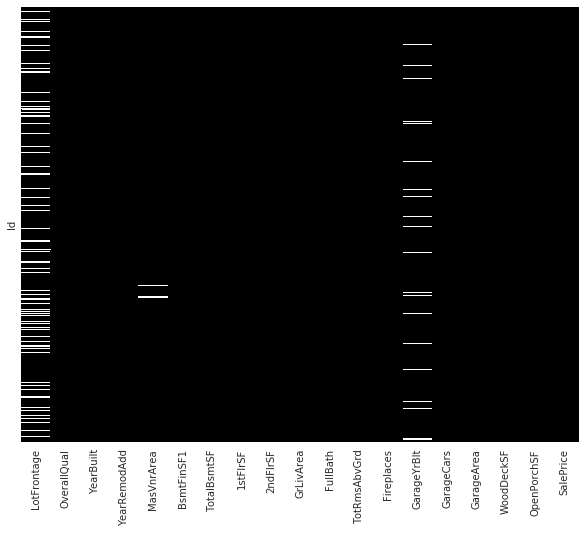

In [63]:
plt.figure(figsize = (10, 8))
sns.heatmap(df_filtered.isnull(), yticklabels=False, cbar=False, cmap='CMRmap')

In [65]:
df_filled = df_filtered.apply(lambda x: x.fillna(np.nanmedian(x)))

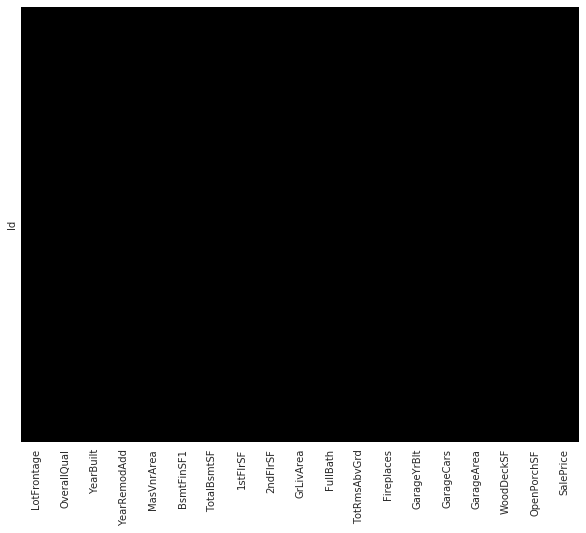

In [66]:
plt.figure(figsize = (10, 8))
sns.heatmap(df_filled.isnull(), yticklabels=False, cbar=False, cmap='CMRmap')

# Separating inputs, output, train and test

In [67]:
y = df_filled['SalePrice']
X = df_filled.drop('SalePrice', axis=1)

In [68]:
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Linear Regression Model

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lm = LinearRegression()

In [72]:
lm.fit(X_train, y_train)

LinearRegression()

In [73]:
preds = lm.predict(X_test)

## Evaluating predictions

In [77]:
err = y_test - preds

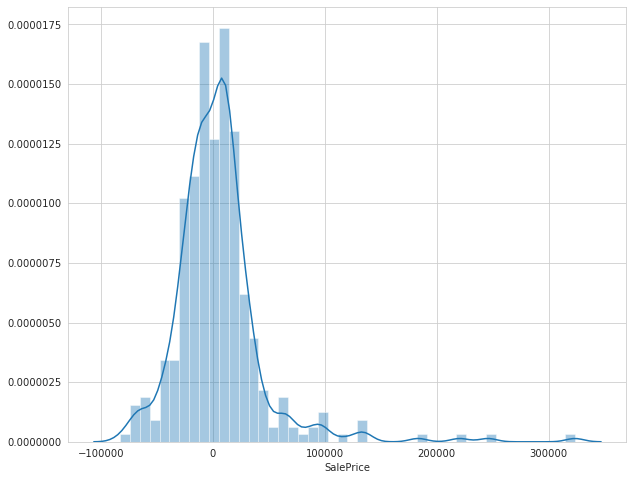

In [80]:
# residual error distribution
plt.figure(figsize = (10, 8))
sns.distplot(err)

<Figure size 1296x864 with 0 Axes>

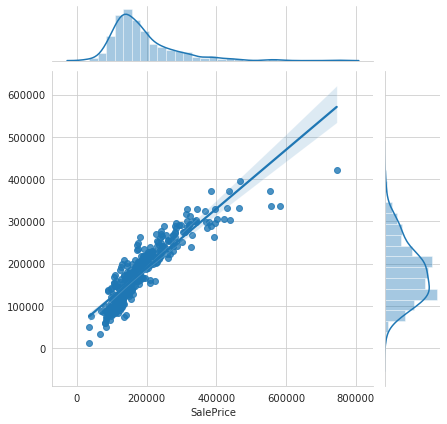

In [85]:
sns.jointplot(y_test, preds, kind='reg', )

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [92]:
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)

In [93]:
print('R2:', round(r2, 2))
print('MAE:', round(mae, 2))
print('MSE:', round(mse, 2))
print('RMSE:', round(rmse, 2))

R2: 0.79
MAE: 25407.05
MSE: 1680435544.54
RMSE: 40993.12


# Random Forest Regressor

In [139]:
from sklearn.ensemble import RandomForestRegressor

In [140]:
rfr = RandomForestRegressor()

In [141]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [142]:
y_pred = rfr.predict(X_test)

## Evaluating predictions

In [143]:
err = y_test - y_pred

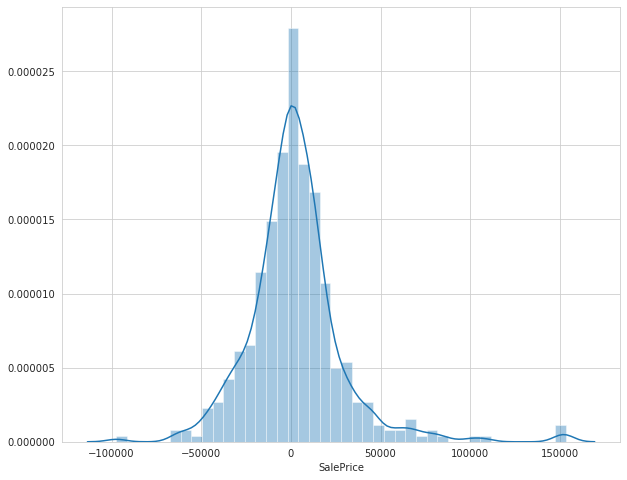

In [144]:
# residual error distribution
plt.figure(figsize = (10, 8))
sns.distplot(err)

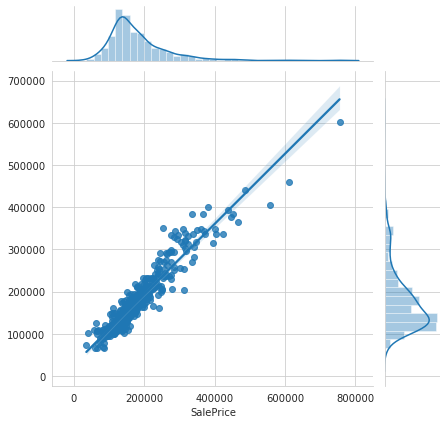

In [145]:
sns.jointplot(y_test, y_pred, kind='reg', )

In [146]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [147]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [148]:
print('R2:', round(r2, 2))
print('MAE:', round(mae, 2))
print('MSE:', round(mse, 2))
print('RMSE:', round(rmse, 2))

R2: 0.9
MAE: 17840.71
MSE: 730840160.26
RMSE: 27034.06


# Testing

In [157]:
df_test = pd.read_csv('test.csv')

In [160]:
df_test.set_index('Id', inplace=True)

In [166]:
X_test = df_test[high_corr_features.index.drop('SalePrice')]

## Dealing with NaNs

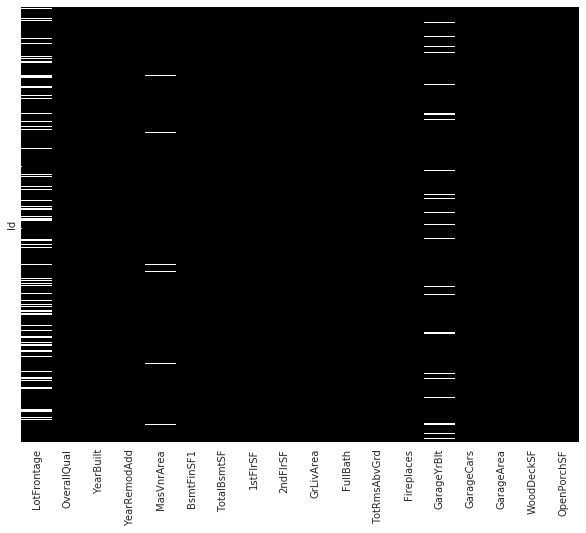

In [168]:
plt.figure(figsize = (10, 8))
sns.heatmap(X_test.isnull(), yticklabels=False, cbar=False, cmap='CMRmap')

In [169]:
X_test_filled = X_test.apply(lambda x: x.fillna(np.nanmedian(x)))

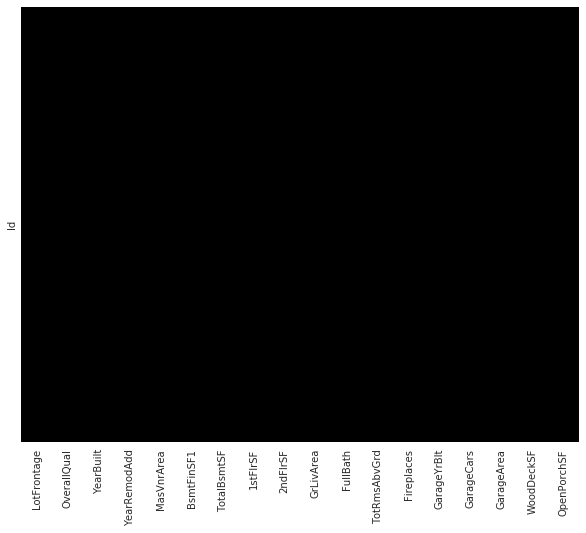

In [170]:
plt.figure(figsize = (10, 8))
sns.heatmap(X_test_filled.isnull(), yticklabels=False, cbar=False, cmap='CMRmap')

In [172]:
y_pred = rfr.predict(X_test_filled)

In [173]:
cols = ('Id', 'SalePrice')

In [174]:
results = pd.DataFrame(list(zip(np.array(X_test_filled.index), y_pred)), columns=cols)

In [175]:
results.to_csv('house_prices_submission.csv', index=False)

In [176]:
pd.read_csv('house_prices_submission.csv')

,Id,SalePrice
0,1461,125257.50
1,1462,149809.00
2,1463,183932.40
3,1464,189412.00
4,1465,209835.58
...,...,...
1454,2915,84375.00
1455,2916,89955.00
1456,2917,156214.50
1457,2918,117315.00
